In [143]:
import json
import calendar
import getpass
import requests
import numpy as np
import geopandas as gpd
import zipfile
import io
import matplotlib.pyplot as plt
from pprint import pprint
from osgeo import gdal
from shapely.geometry import box
from pathlib import Path

# Login to NASA Earthdata

In [2]:
nasa_earthdata_api = 'https://appeears.earthdatacloud.nasa.gov/api/'

nasa_earthdata_user = getpass.getpass(prompt = 'Enter NASA Earthdata Login Username: ')      
nasa_earthdata_password = getpass.getpass(prompt = 'Enter NASA Earthdata Login Password: ') 

token_response = requests.post(f"{nasa_earthdata_api}login", auth=(nasa_earthdata_user, nasa_earthdata_password)).json()

token = token_response['token']                      
head = {'Authorization': f"Bearer {token}"}

del nasa_earthdata_user, nasa_earthdata_password

# Explore Products

In [3]:
product_response = requests.get(f"{nasa_earthdata_api}product").json()                         
print(f"AppEEARS currently supports {len(product_response)} products.") 
products = {p['ProductAndVersion']: p for p in product_response}

AppEEARS currently supports 149 products.


In [11]:
products

{'GPW_DataQualityInd.411': {'Product': 'GPW_DataQualityInd',
  'Platform': 'GPW',
  'Description': 'Quality of Input Data for Population Count and Density Grids',
  'RasterType': 'Tile',
  'Resolution': '1000m',
  'TemporalGranularity': 'Quinquennial',
  'Version': '411',
  'Available': True,
  'DocLink': 'https://doi.org/10.7927/H42Z13KG',
  'Source': 'SEDAC',
  'TemporalExtentStart': '2000-01-01',
  'TemporalExtentEnd': '2020-12-31',
  'Deleted': False,
  'DOI': '10.7927/H42Z13KG',
  'Info': {},
  'ProductAndVersion': 'GPW_DataQualityInd.411'},
 'GPW_UN_Adj_PopCount.411': {'Product': 'GPW_UN_Adj_PopCount',
  'Platform': 'GPW',
  'Description': 'UN-adjusted Population Count',
  'RasterType': 'Tile',
  'Resolution': '1000m',
  'TemporalGranularity': 'Quinquennial',
  'Version': '411',
  'Available': True,
  'DocLink': 'https://doi.org/10.7927/H4PN93PB',
  'Source': 'SEDAC',
  'TemporalExtentStart': '2000-01-01',
  'TemporalExtentEnd': '2020-12-31',
  'Deleted': False,
  'DOI': '10.7927

# Show All Products with Description Containing Keyword

In [4]:
def get_products_with_description(keyword):
    for p in {p['ProductAndVersion'] for p in product_response}:                                            
        if keyword in products[p]['Description']:
            pprint(products[p])

## Vegetation
Below is all products with a description that contains the keyword "Vegetation"

In [34]:
get_products_with_description(keyword='Vegetation')

{'Available': True,
 'DOI': '10.5067/MODIS/MOD13A3.061',
 'Deleted': False,
 'Description': 'Vegetation Indices (NDVI & EVI)',
 'DocLink': 'https://doi.org/10.5067/MODIS/MOD13A3.061',
 'Info': {},
 'Platform': 'Terra MODIS',
 'Product': 'MOD13A3',
 'ProductAndVersion': 'MOD13A3.061',
 'RasterType': 'Tile',
 'Resolution': '1000m',
 'Source': 'LP DAAC',
 'TemporalExtentEnd': 'Present',
 'TemporalExtentStart': '2000-02-01',
 'TemporalGranularity': 'Monthly',
 'Version': '061'}
{'Available': True,
 'DOI': '10.5067/VIIRS/VJ113A3.002',
 'Deleted': False,
 'Description': 'Vegetation Indices',
 'DocLink': 'https://doi.org/10.5067/VIIRS/VJ113A3.002',
 'Info': {'provider_id': 'lp_prod'},
 'Platform': 'NOAA-20 VIIRS',
 'Product': 'VJ113A3',
 'ProductAndVersion': 'VJ113A3.002',
 'RasterType': 'Tile',
 'Resolution': '1000m',
 'Source': 'LP DAAC',
 'TemporalExtentEnd': 'Present',
 'TemporalExtentStart': '2018-01-01',
 'TemporalGranularity': 'Monthly',
 'Version': '002'}
{'Available': True,
 'DOI': '

## Elevation
Below is all products with a description that contains the keyword "Elevation"

In [6]:
get_products_with_description(keyword='Elevation')

{'Available': True,
 'DOI': '10.5067/ASTER/ASTGTM_NC.003',
 'Deleted': False,
 'Description': 'Elevation',
 'DocLink': 'https://doi.org/10.5067/ASTER/ASTGTM_NC.003',
 'Info': {},
 'Platform': 'ASTER GDEM',
 'Product': 'ASTGTM_NC',
 'ProductAndVersion': 'ASTGTM_NC.003',
 'RasterType': 'Tile',
 'Resolution': '30m',
 'Source': 'LP DAAC',
 'TemporalExtentEnd': '2000-03-01',
 'TemporalExtentStart': '2000-03-01',
 'TemporalGranularity': 'Static',
 'Version': '003'}
{'Available': True,
 'DOI': '10.5067/MEaSUREs/NASADEM/NASADEM_NC.001',
 'Deleted': False,
 'Description': 'Elevation',
 'DocLink': 'https://doi.org/10.5067/MEaSUREs/NASADEM/NASADEM_NC.001',
 'Info': {},
 'Platform': 'NASADEM',
 'Product': 'NASADEM_NC',
 'ProductAndVersion': 'NASADEM_NC.001',
 'RasterType': 'Tile',
 'Resolution': '30m',
 'Source': 'LP DAAC',
 'TemporalExtentEnd': '2/21/2000',
 'TemporalExtentStart': '2/11/2000',
 'TemporalGranularity': 'Static',
 'Version': '001'}
{'Available': True,
 'DOI': '10.5067/MEaSUREs/SRTM/

# Weather

In [9]:
get_products_with_description(keyword='Weather')

{'Available': True,
 'DOI': '10.3334/ORNLDAAC/2129',
 'Deleted': False,
 'Description': 'Daily Surface Weather Data for North America',
 'DocLink': 'https://doi.org/10.3334/ORNLDAAC/2129',
 'Info': {},
 'Platform': 'DAYMET',
 'Product': 'DAYMET',
 'ProductAndVersion': 'DAYMET.004',
 'RasterType': 'Tile',
 'Resolution': '1000m',
 'Source': 'ORNL',
 'TemporalExtentEnd': '2023-12-31',
 'TemporalExtentStart': '1950-01-01',
 'TemporalGranularity': 'Daily',
 'Version': '004'}


# Select Products

In [54]:
selected_products = [
    products['MOD13A3.061'], 
    products['MOD15A2H.061'], 
    products['MOD11A2.061'],
    products['MOD14A2.061'],
    products['MCD64A1.061'],
    products['MOD16A2GF.061'],
    products['DAYMET.004'],
    products['NASADEM_NC.001'],
    products['ASTWBD_ATTNC.001'],
]
print("Selected products: ")
pprint(selected_products)

Selected products: 
[{'Available': True,
  'DOI': '10.5067/MODIS/MOD13A3.061',
  'Deleted': False,
  'Description': 'Vegetation Indices (NDVI & EVI)',
  'DocLink': 'https://doi.org/10.5067/MODIS/MOD13A3.061',
  'Info': {},
  'Platform': 'Terra MODIS',
  'Product': 'MOD13A3',
  'ProductAndVersion': 'MOD13A3.061',
  'RasterType': 'Tile',
  'Resolution': '1000m',
  'Source': 'LP DAAC',
  'TemporalExtentEnd': 'Present',
  'TemporalExtentStart': '2000-02-01',
  'TemporalGranularity': 'Monthly',
  'Version': '061'},
 {'Available': True,
  'DOI': '10.5067/MODIS/MOD15A2H.061',
  'Deleted': False,
  'Description': 'Leaf Area Index (LAI) and Fraction of Photosynthetically '
                 'Active Radiation (FPAR)',
  'DocLink': 'https://doi.org/10.5067/MODIS/MOD15A2H.061',
  'Info': {},
  'Platform': 'Terra MODIS',
  'Product': 'MOD15A2H',
  'ProductAndVersion': 'MOD15A2H.061',
  'RasterType': 'Tile',
  'Resolution': '500m',
  'Source': 'LP DAAC',
  'TemporalExtentEnd': 'Present',
  'TemporalE

# Explore Product Layers

In [55]:
for selected_product in selected_products:
    selected_product_layers = requests.get(f"{nasa_earthdata_api}product/{selected_product['ProductAndVersion']}").json()
    print(f"{selected_product['ProductAndVersion']} Layer ")
    pprint(list(selected_product_layers.keys()))

MOD13A3.061 Layer 
['_1_km_monthly_EVI',
 '_1_km_monthly_MIR_reflectance',
 '_1_km_monthly_NDVI',
 '_1_km_monthly_NIR_reflectance',
 '_1_km_monthly_VI_Quality',
 '_1_km_monthly_blue_reflectance',
 '_1_km_monthly_pixel_reliability',
 '_1_km_monthly_red_reflectance',
 '_1_km_monthly_relative_azimuth_angle',
 '_1_km_monthly_sun_zenith_angle',
 '_1_km_monthly_view_zenith_angle']
MOD15A2H.061 Layer 
['FparExtra_QC',
 'FparLai_QC',
 'FparStdDev_500m',
 'Fpar_500m',
 'LaiStdDev_500m',
 'Lai_500m']
MOD11A2.061 Layer 
['Clear_sky_days',
 'Clear_sky_nights',
 'Day_view_angl',
 'Day_view_time',
 'Emis_31',
 'Emis_32',
 'LST_Day_1km',
 'LST_Night_1km',
 'Night_view_angl',
 'Night_view_time',
 'QC_Day',
 'QC_Night']
MOD14A2.061 Layer 
['FireMask', 'QA']
MCD64A1.061 Layer 
['Burn_Date', 'Burn_Date_Uncertainty', 'First_Day', 'Last_Day', 'QA']
MOD16A2GF.061 Layer 
['ET_500m', 'ET_QC_500m', 'LE_500m', 'PET_500m', 'PLE_500m']
DAYMET.004 Layer 
['dayl', 'prcp', 'srad', 'swe', 'tmax', 'tmin', 'vp']
NASADE

# Add Layers of Interest

In [122]:
layers = [
    ('MOD13A3.061', '_1_km_monthly_NDVI'),
    ('MOD13A3.061', '_1_km_monthly_EVI'), 
    ('MOD15A2H.061', 'Lai_500m'),
    ('MOD11A2.061', 'LST_Day_1km'),
    ('MOD14A2.061', 'FireMask'),
    ('MCD64A1.061', 'Burn_Date'),
    ('MCD64A1.061', 'First_Day'),
    ('MCD64A1.061', 'Last_Day'),
    ('MOD16A2GF.061', 'ET_500m'),
    ('DAYMET.004', 'dayl'),
    ('DAYMET.004', 'prcp'),
    ('DAYMET.004', 'tmax'),
    ('DAYMET.004', 'tmin'),
    ('DAYMET.004', 'vp'),
    ('NASADEM_NC.001', 'NASADEM_HGT'),
    ('ASTWBD_ATTNC.001', 'ASTWBD_att')
]
products_layers = [{'product': l[0], 'layer': l[1]} for l in layers]
products_layers

[{'product': 'MOD13A3.061', 'layer': '_1_km_monthly_NDVI'},
 {'product': 'MOD13A3.061', 'layer': '_1_km_monthly_EVI'},
 {'product': 'MOD15A2H.061', 'layer': 'Lai_500m'},
 {'product': 'MOD11A2.061', 'layer': 'LST_Day_1km'},
 {'product': 'MOD14A2.061', 'layer': 'FireMask'},
 {'product': 'MCD64A1.061', 'layer': 'Burn_Date'},
 {'product': 'MCD64A1.061', 'layer': 'First_Day'},
 {'product': 'MCD64A1.061', 'layer': 'Last_Day'},
 {'product': 'MOD16A2GF.061', 'layer': 'ET_500m'},
 {'product': 'DAYMET.004', 'layer': 'dayl'},
 {'product': 'DAYMET.004', 'layer': 'prcp'},
 {'product': 'DAYMET.004', 'layer': 'tmax'},
 {'product': 'DAYMET.004', 'layer': 'tmin'},
 {'product': 'DAYMET.004', 'layer': 'vp'},
 {'product': 'NASADEM_NC.001', 'layer': 'NASADEM_HGT'},
 {'product': 'ASTWBD_ATTNC.001', 'layer': 'ASTWBD_att'}]

# Explore Available Projections

In [58]:
projections = requests.get(f"{nasa_earthdata_api}spatial/proj").json()
pprint(projections)
projs = {}                                  
for p in projections: 
    projs[p['Name']] = p 
pprint(list(projs.keys()))

[{'Available': True,
  'Datum': '',
  'Description': '',
  'EPSG': '',
  'GridMapping': '',
  'LongName': 'Native Projection',
  'Name': 'native',
  'Platforms': '',
  'Proj4': '',
  'Units': ''},
 {'Available': True,
  'Datum': 'wgs84',
  'Description': '',
  'EPSG': 4326.0,
  'GridMapping': 'latitude_longitude',
  'LongName': 'Geographic',
  'Name': 'geographic',
  'Platforms': "['SRTM', 'ECOSTRESS', 'SSEBop ET', 'GPW', 'ASTER GDEM', "
               "'NASADEM', 'MEaSUREs LSTE', 'EMIT']",
  'Proj4': '+proj=longlat +datum=WGS84 +no_defs=True',
  'Units': 'degrees'},
 {'Available': True,
  'Datum': '',
  'Description': '',
  'EPSG': '',
  'GridMapping': 'sinusoidal',
  'LongName': 'MODIS Sinusoidal',
  'Name': 'sinu_modis',
  'Platforms': "['Combined MODIS', 'Terra MODIS', 'Aqua MODIS', 'Suomi NPP "
               "VIIRS', 'NOAA-20 VIIRS', 'Global WELD']",
  'Proj4': '+proj=sinu +lon_0=0 +x_0=0 +y_0=0 +R=6371007.181 +units=m '
           '+no_defs=True',
  'Units': 'meters'},
 {'Availa

# Define Area of Interest

In [114]:
canada_boundary_shapefile_path = 'data/canada_boundary/lpr_000b16a_e.shp'

canada_boundary = gpd.read_file(canada_boundary_shapefile_path)
canada_boundary

,PRUID,PRNAME,PRENAME,PRFNAME,PREABBR,PRFABBR,geometry
0,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,Newfoundland and Labrador,Terre-Neuve-et-Labrador,N.L.,T.-N.-L.,"MULTIPOLYGON (((8307365.589 2582136.711, 83083..."
1,11,Prince Edward Island / Île-du-Prince-Édouard,Prince Edward Island,Île-du-Prince-Édouard,P.E.I.,Î.-P.-É.,"MULTIPOLYGON (((8435711.754 1679935.966, 84358..."
2,12,Nova Scotia / Nouvelle-Écosse,Nova Scotia,Nouvelle-Écosse,N.S.,N.-É.,"MULTIPOLYGON (((8470851.646 1624745.011, 84710..."
3,13,New Brunswick / Nouveau-Brunswick,New Brunswick,Nouveau-Brunswick,N.B.,N.-B.,"MULTIPOLYGON (((8176224.537 1722553.46, 817623..."
4,24,Quebec / Québec,Quebec,Québec,Que.,Qc,"MULTIPOLYGON (((8399709.494 2261445.703, 84005..."
5,35,Ontario,Ontario,Ontario,Ont.,Ont.,"MULTIPOLYGON (((6378815.614 2295412.44, 637874..."
6,46,Manitoba,Manitoba,Manitoba,Man.,Man.,"MULTIPOLYGON (((6039656.509 2636304.343, 60396..."
7,47,Saskatchewan,Saskatchewan,Saskatchewan,Sask.,Sask.,"POLYGON ((5248633.914 2767057.263, 5249285.64 ..."
8,48,Alberta,Alberta,Alberta,Alta.,Alb.,"POLYGON ((5228304.177 2767597.891, 5228098.463..."
9,59,British Columbia / Colombie-Britannique,British Columbia,Colombie-Britannique,B.C.,C.-B.,"MULTIPOLYGON (((4018904.414 3410247.271, 40194..."


Number of coordinates : 3,390,960


Text(0.5, 1.0, 'Canada Boundary (EPSG:3347)')

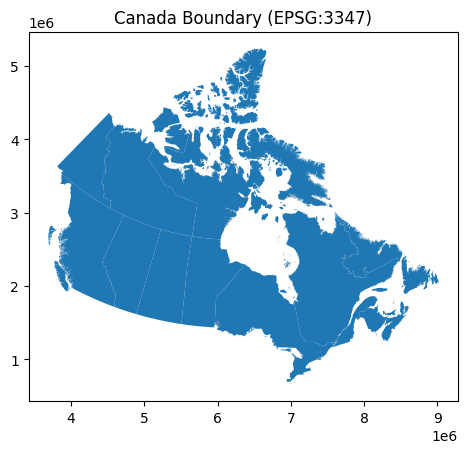

In [115]:
print(f"Number of coordinates : {canada_boundary.count_coordinates().sum():,}")
ax = canada_boundary.plot()
ax.set_title(f"Canada Boundary (EPSG:{canada_boundary.crs.to_epsg()})")

## Remove Area Not of Interest

Number of coordinates : 1,945,419


Text(0.5, 1.0, 'Canada Boundary (Restricted to South of 60deg) (EPSG:3347)')

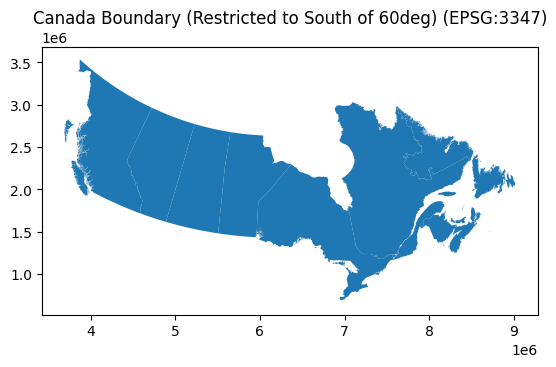

In [116]:
canada_boundary = canada_boundary[(canada_boundary['PRUID'] != '60') & (canada_boundary['PRUID'] != '61') & (canada_boundary['PRUID'] != '62')]
print(f"Number of coordinates : {canada_boundary.count_coordinates().sum():,}")
ax = canada_boundary.plot()
ax.set_title(f"Canada Boundary (Restricted to South of 60deg) (EPSG:{canada_boundary.crs.to_epsg()})")

# Grid Area of Interest

## Canada-wise Grid

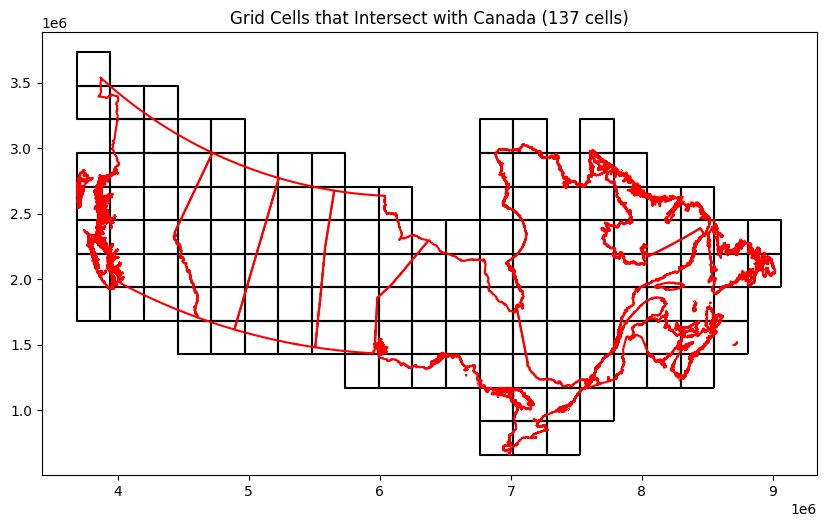

In [119]:
minx, miny, maxx, maxy = canada_boundary.total_bounds

grid_size_in_meters = 256_000.0 # 500m resolution * 512 pixels = 256 000 meters per side

x_coords = np.arange(minx, maxx, grid_size_in_meters)
y_coords = np.arange(miny, maxy, grid_size_in_meters)
grid_cells = [box(x, y, x + grid_size_in_meters, y + grid_size_in_meters) for x in x_coords for y in y_coords]

grid = gpd.GeoDataFrame({'geometry': grid_cells}, crs=canada_boundary.crs)

grid_within_boundary = grid[grid.intersects(canada_boundary.union_all())]

fig, ax = plt.subplots(figsize=(10, 10))
grid_within_boundary.boundary.plot(ax=ax, edgecolor='black', facecolor='none')
canada_boundary.boundary.plot(ax=ax, edgecolor='red')
ax.set_title(f"Grid Cells that Intersect with Canada ({len(grid_within_boundary)} cells)")
plt.show()

# Reproject Area of Interest

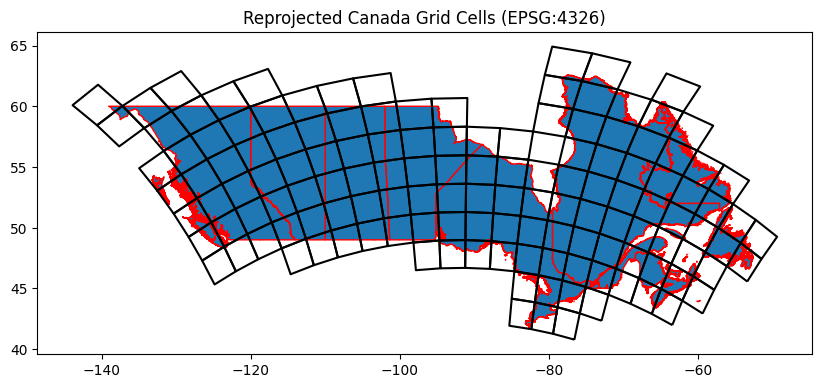

In [120]:
target_epsg = int(projs['geographic']['EPSG'])
canada_boundary = canada_boundary.to_crs(epsg=target_epsg)
grid_within_boundary = grid_within_boundary.to_crs(epsg=target_epsg)

fig, ax = plt.subplots(figsize=(10, 10))
grid_within_boundary.boundary.plot(ax=ax, edgecolor='black', facecolor='none')
ax = canada_boundary.plot(ax=ax, edgecolor='red')
ax.set_title(f"Reprojected Canada Grid Cells (EPSG:{canada_boundary.crs.to_epsg()})")
plt.show()

# Submit Task

In [144]:
def submit_task(
    grid_within_boundary: gpd.GeoDataFrame, 
    start_date_mm_dd_yyyy: str, 
    end_date_mm_dd_yyyy: str,
    product_layer: dict,
    task_name: str
) -> dict:
    geo_area_json = json.loads(grid_within_boundary.to_json())
    task_type = "area" # 'area', 'point'
    output_format = 'netcdf4' # 'netcdf4', 'geotiff'
    output_projection = projs['geographic']['Name']
    recurring = False    
    task = {
        "task_type": task_type,
        "task_name": task_name,
        "params": {
            "dates": [
                {
                    "startDate": start_date_mm_dd_yyyy,
                    "endDate": end_date_mm_dd_yyyy,
                    "recurring": recurring
                }
            ],
            "layers": [product_layer],
            'output': {
                'format': {
                    'type': output_format
                },
                'projection': output_projection
            },
            "geo": geo_area_json,
        }
    }

    task_response = requests.post(f"{nasa_earthdata_api}task", json=task, headers=head)
    pprint(f"Status Code: {task_response.status_code} {task_response.reason}")
    task_response_json = task_response.json()
    pprint(f"Task Response JSON: {task_response_json}")
    
    return task_response_json

In [145]:
year_product_layer_requests = {}
for year in range(2001, 2024):
    print(f"==================== Year: {year} ====================")
    for month in range(1, 12):
        print(f"==================== Month: {month:02} ====================")
        _, last_day = calendar.monthrange(year, month + 1)
        for product_layer in products_layers:
            print(f"==================== Product: {product_layer['product']} Layer: {product_layer['layer']} =================")
            
            task_response_json = submit_task(
                grid_within_boundary=grid_within_boundary, 
                start_date_mm_dd_yyyy=f"{month:02}-01-{year}", 
                end_date_mm_dd_yyyy=f"{month+1:02}-{last_day}-{year}",
                product_layer=product_layer,
                task_name=f"canada_500m_512pixels_{product_layer['product']}_{product_layer['layer']}_{year}"
            )
            
            year_product_layer_requests[(f"{year}_{product_layer['product']}_{product_layer['layer']}")] = task_response_json['task_id']
            
            with open('data/year_product_layer_requests.json', 'w') as f:
                json.dump(year_product_layer_requests, f)

==================== Year: 2001 ====================
==================== Month: 01 ====================
==================== Product: MOD13A3.061 Layer: _1_km_monthly_NDVI =================
'Status Code: 202 ACCEPTED'
("Task Response JSON: {'task_id': '1320fdde-5e29-4259-b2fe-b7a3cf0bf700', "
 "'status': 'pending'}")
==================== Product: MOD13A3.061 Layer: _1_km_monthly_EVI =================
'Status Code: 202 ACCEPTED'
("Task Response JSON: {'task_id': '122a1452-3ea8-4e76-b843-c5750dfd6eb8', "
 "'status': 'pending'}")
==================== Product: MOD15A2H.061 Layer: Lai_500m =================
'Status Code: 202 ACCEPTED'
("Task Response JSON: {'task_id': '3b096beb-4082-4bde-9102-1162f62e3cc1', "
 "'status': 'pending'}")
==================== Product: MOD11A2.061 Layer: LST_Day_1km =================
'Status Code: 202 ACCEPTED'
("Task Response JSON: {'task_id': '8fe51ece-6b26-4d72-84c4-baa103c96182', "
 "'status': 'pending'}")
==================== Product: MOD14A2.061 Layer: Fir

# Download Data
You must wait until the data is processed.  
You should receive an email when it is done or you can check via https://appeears.earthdatacloud.nasa.gov/explore

In [17]:
task_id = '796ea315-54c1-4801-bef3-7bb80bff202f' # or task_response_json['task_id']
bundle = requests.get(f"{nasa_earthdata_api}bundle/{task_id}", headers=head).json()
bundle 

{'files': [{'sha256': '20c15f858329622bf2a4a1fa90039f7e3e27722af09d0bae955fb43ea0196fe6',
   'file_id': '2d78b2eb-29f3-4adc-8059-33e0fb259b68',
   'file_name': 'DAYMET.004_1km_aid0001.nc',
   'file_size': 17107162,
   'file_type': 'nc',
   's3_url': 's3://appeears-output/796ea315-54c1-4801-bef3-7bb80bff202f/DAYMET.004_1km_aid0001.nc'},
  {'sha256': '12181d13a3e5e9b2228cc604a022bb41e7dd84a9c3373dde6560e112c2b8bafc',
   'file_id': '02c81aba-908e-4975-96db-8c76c153e533',
   'file_name': 'MOD13Q1.061_250m_aid0001.nc',
   'file_size': 14784435,
   'file_type': 'nc',
   's3_url': 's3://appeears-output/796ea315-54c1-4801-bef3-7bb80bff202f/MOD13Q1.061_250m_aid0001.nc'},
  {'sha256': 'ae9f2555f9f31e55ef23443c245c4f17ec862837bcf83495510d6117a1ac0828',
   'file_id': 'c256fbd1-7a8f-4214-ad50-2aeba44df117',
   'file_name': 'SRTMGL1_NC.003_30m_aid0001.nc',
   'file_size': 51677145,
   'file_type': 'nc',
   's3_url': 's3://appeears-output/796ea315-54c1-4801-bef3-7bb80bff202f/SRTMGL1_NC.003_30m_aid000

In [18]:
files = {}                                                      
for file_id in bundle['files']: 
    files[file_id['file_id']] = file_id['file_name']  
files

{'2d78b2eb-29f3-4adc-8059-33e0fb259b68': 'DAYMET.004_1km_aid0001.nc',
 '02c81aba-908e-4975-96db-8c76c153e533': 'MOD13Q1.061_250m_aid0001.nc',
 'c256fbd1-7a8f-4214-ad50-2aeba44df117': 'SRTMGL1_NC.003_30m_aid0001.nc',
 '8060db5c-1ce5-482e-8217-987453b2d085': 'SRTMGL1_NUMNC.003_30m_aid0001.nc',
 'b582c264-7751-4e5d-b22a-95bc1ec81d32': 'DAYMET.004_1km_aid0002.nc',
 '5770826f-b967-44f8-a06b-81bc5c423d96': 'MOD13Q1.061_250m_aid0002.nc',
 'd7dbc666-0786-44eb-b34b-02ae7e47adc3': 'SRTMGL1_NC.003_30m_aid0002.nc',
 '8e5bc182-a0c4-4348-ace9-c8b18c216b67': 'SRTMGL1_NUMNC.003_30m_aid0002.nc',
 'd2f609f0-12e0-40c2-a001-acfdd88a5390': 'DAYMET.004_1km_aid0003.nc',
 '1168108f-1430-41fd-86c7-625355888a08': 'MOD13Q1.061_250m_aid0003.nc',
 'f7ed8271-e4d6-4f5a-a1bd-1dc00481972b': 'SRTMGL1_NC.003_30m_aid0003.nc',
 '73c418bf-19e2-4df9-a192-9e45af10debf': 'SRTMGL1_NUMNC.003_30m_aid0003.nc',
 'c3e51c75-4f1d-4493-99b8-06b735040095': 'DAYMET.004_1km_aid0004.nc',
 'f163d391-f389-444b-bfb5-5c89630f2c1c': 'MOD13Q1.0

In [67]:
features_dir = Path('data/features/')

In [35]:
for file_id in files.keys():
    if not files[file_id].endswith('.nc') or "NUMNC" in files[file_id]:
        continue
    dl = requests.get(f"{nasa_earthdata_api}bundle/{task_id}/{file_id}", headers=head, stream=True, allow_redirects = 'True')                                # Get a stream to the bundle file
    if files[file_id].endswith('.tif'):
        filename = files[file_id].split('/')[1]
    else:
        filename = files[file_id] 
    with open(features_dir / Path(filename), 'wb') as file_id:                                                                  
        for data in dl.iter_content(chunk_size=8192): 
            file_id.write(data) 
print(f"Downloaded files can be found at: {features_dir}")

Downloaded files can be found at: data/features


In [74]:
band_ds.RasterXSize, band_ds.RasterYSize

(1857, 1265)

In [81]:
province_boundary.crs

<Projected CRS: PROJCS["PCS_Lambert_Conformal_Conic",GEOGCS["NAD83 ...>
Name: PCS_Lambert_Conformal_Conic
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [83]:
import pyproj

In [85]:
pyproj.CRS.from_wkt(band_ds.GetProjection())

<Geographic 2D CRS: GEOGCS["unknown",DATUM["WGS_1984",SPHEROID["WGS 84 ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# Preview Features

In [68]:
features_ds = gdal.Open(str((features_dir / 'MOD13Q1.061_250m_aid0001.nc').resolve()))
features_proj = features_ds.GetProjection()

for subdataset in features_ds.GetSubDatasets():
    band_ds = gdal.Open(subdataset[0])
    band = band_ds.GetRasterBand(1)
    band_type = gdal.GetDataTypeName(band.DataType)
    band_min, band_max, band_mean, band_stddev = band.GetStatistics(True, True)
    band_desc = band_ds.GetDescription().split(':')[-1]
    print(f"Band {band_desc}: ({band.GetYSize()},{band.GetXSize()}) Type={band_type}, Min={band_min}, Max={band_max}, Mean={band_mean}, StdDev={band_stddev}")
    print(f"Band Projection : {band_ds.GetProjection()}")
    print("")
    

    band_data = band_ds.ReadAsArray()

    plt.figure(figsize=(8, 6))
    plt.imshow(band_data.transpose((1, 2, 0)), cmap='RdYlGn')
    plt.colorbar(label=band_desc)
    plt.title(band_desc)
    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.show()

AttributeError: 'Band' object has no attribute 'GetYSize'

# Download Target

In [3]:
target_dir = Path('data/target/')

In [69]:
nbac_response = requests.get("https://cwfis.cfs.nrcan.gc.ca/downloads/nbac/nbac_1972_2023_20240530_shp.zip")
zipfile.ZipFile(io.BytesIO(nbac_response.content)).extractall(target_dir)

In [4]:
target_shp = list(target_dir.glob('*.shp'))[0]
target_shp

PosixPath('data/target/nbac_1972_2023_20240530.shp')

# Preview Target

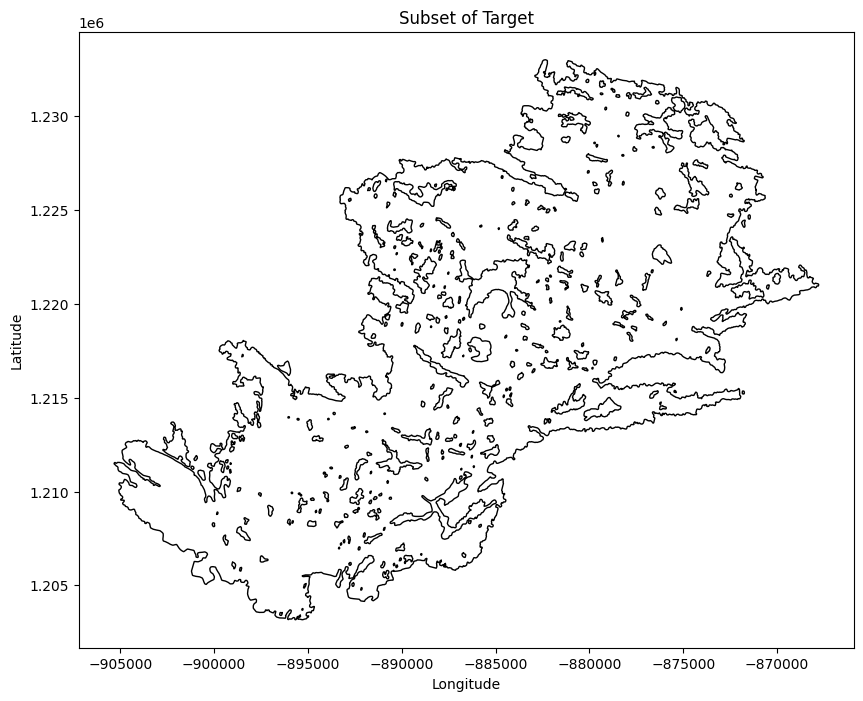

In [21]:
gdf = gpd.read_file(target_shp, rows=1)

fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, edgecolor='k', facecolor='none')
plt.title('Subset of Target')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Reproject Target

In [5]:
reprojected_target_shp = Path(target_shp.parent, f"{target_shp.stem}_reprojected.shp")

In [ ]:
gdal.VectorTranslate(
    str(reprojected_target_shp.resolve()), 
    str(target_shp.resolve()), 
    dstSRS='EPSG:4326',
    reproject=True
)

# Preview Target

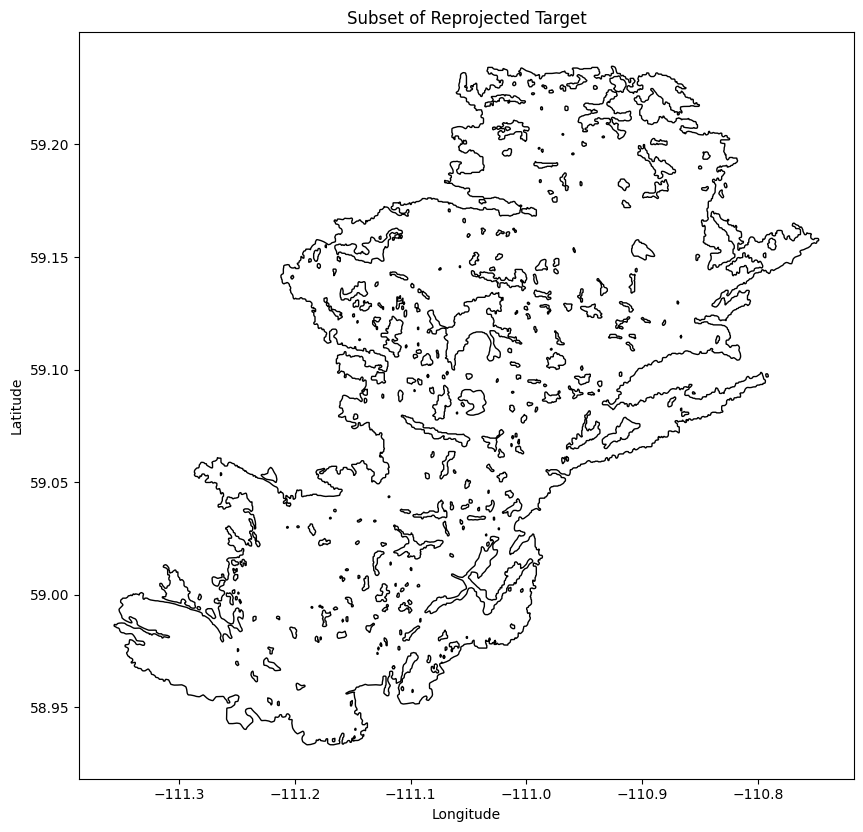

In [22]:
gdf = gpd.read_file(reprojected_target_shp, rows=1)

fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, edgecolor='k', facecolor='none')
plt.title('Subset of Reprojected Target')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()